<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-09/Tugas_ANN_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Klasifikasi Dataset MNIST dengan Artificial Neural Network

### Tujuan
Tujuan dari klasifikasi ini adalah untuk melatih model ANN agar dapat mengenali gambar digit angka tulisan tangan yang ada di dataset MNIST.

### 1. Import Library

In [1]:
import cv2 as cv
import numpy as np
import tensorflow as tfl
import matplotlib.pyplot as plt

### 2. Loading Dataset
Mengakses objek MNIST dari keras.datasets. MNIST memiliki 60.000 data training dan 10.000 data testing. Gambar yang ada pada dataset tersebut memiliki resolusi 28x28 pixel.

Dengan memanggil *load_function()*, maka akan otomatis melakukan split data berdasarkan data training dan data testing.

In [2]:
(X_train, y_train), (X_test, y_test) = tfl.keras.datasets.mnist.load_data()

In [3]:
# show image input shape
print('Image input shape : ', X_train.shape)
# show shape of training label
print('Image shape of training label : ', y_train.shape)
# show image testing shape
print('Image testing shape : ', X_test.shape)
# show shape of testing labels
print('Image shape of testing label : ', y_test.shape)

Image input shape :  (60000, 28, 28)
Image shape of training label :  (60000,)
Image testing shape :  (10000, 28, 28)
Image shape of testing label :  (10000,)


### 3. Plotting Data

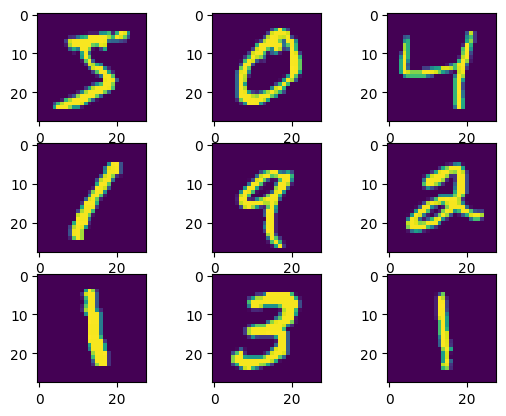

In [4]:
# plotting 9 gambar pertama pada data train dari MNIST
fig, ax = plt.subplots(3,3)
count = 0
for i in range(3):
  for j in range(3):
    ax[i,j].imshow(X_train[count])
    count += 1

### 4. Normalisasi Data

Melakukan normalisasi menggunakan function **keras.utils** dengan memperkecil semua nilai sehingga nilainya berada di antara 0 dan 1.

In [5]:
X_train_norm = tfl.keras.utils.normalize(X_train, axis=1)
X_test_norm = tfl.keras.utils.normalize(X_test, axis=1)

### 5. Membuat Model Neural Network


In [6]:
ann_model = tfl.keras.models.Sequential()

Model yang dibuat pertama kali ini belum memiliki layer, maka pada langkah selanjutnya adalah menambahkan layer ke model ANN yang sudah diinisialisasi.

### 6. Membuat Layer Input

In [7]:
# input layer
ann_model.add(tfl.keras.layers.Flatten(input_shape=(28, 28)))

Pada tahap di atas, dilakukan perintah untuk spesfikasi bentuk input gambar yaitu (28,28), yang merepresentasikan resolusi gambar pada dataset yaitu 28x28 pixel.
Flattened layer akan meratakan masukan dan menjadikannya satu dimensi.Maka, grid gambar yang awalnya 28x28 akan menjadi 784 neuron yang berbaris.

### 7. Membuat Layer Kedua dan Ketiga

In [8]:
# layer hidden pertama
ann_model.add(tfl.keras.layers.Dense(units=128, activation=tfl.nn.relu))

# layer hidden kedua
ann_model.add(tfl.keras.layers.Dense(units=128, activation=tfl.nn.relu))

Pada tahap ini ditambahkan 2 hidden layer yang pada masing-masing layernya memiliki 128 neuron. Tiap-tiap layer menggunakan activation function yang berjenis **ReLU function**.

### 8. Membuat Layer Output

In [9]:
# output layer ann_model
ann_model.add(tfl.keras.layers.Dense(units=10, activation=tfl.nn.softmax))

Pada layer yang terakhir atau layer output terdapat 10 neuron, dan pada layer output ini menggunakan activation function yang berbeda dari layer yang sebelumnya.
Jumlah 10 neuron merepresentasikan model hasil yang diinginkan (angka 0-9) dengan keyakinan bahwa jumlah tersebut adalah klasifikasi yang tepat.

In [10]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 9. Compile Model ANN

Sebelum mulai melakukan train dan testing model, perlu untuk mengkompilasinya terlebih dahulu, yang mana kompilasi ini bertujuan untuk menyatukan arsitektur ANN.

In [13]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 10. Training dan Testing

#### Melakukan training
Training model ANN yang telahh dibuat dan dikompilasi, dengan epoch 10, dan batch_size 100.

In [14]:
ann_model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 5s 7ms/step - loss: 2.4577 - accuracy: 0.8728
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.4849 - accuracy: 0.9313
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2956 - accuracy: 0.9470
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2221 - accuracy: 0.9555
Epoch 5/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1792 - accuracy: 0.9620
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1586 - accuracy: 0.9643
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1384 - accuracy: 0.9672
Epoch 8/10
600/600 [==============================] - 3s 6ms/step - loss: 0.1287 - accuracy: 0.9701
Epoch 9/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1126 - accuracy: 0.9725
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0926 - accuracy: 0.9755

### 11. Evaluasi Model
Menggunakan method evaluate() untuk mengetahui akurasi dan nilai loss.

In [15]:
loss, accuracy = ann_model.evaluate(X_test, y_test)
print('Loss : ', loss)
print('Akurasi : ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.9550
Loss :  0.26035988330841064
Akurasi :  0.9549999833106995


Nilai loss tersebut menggambarkan seberapa besar kesalahan antara output yang dihasilkan oleh neural network dengan output yang diharapkan. Pada hasil evaluasi di atas nilai **loss sekitar 26%**, dan **akurasi sebesar 95,4%**

### 12. Prediksi
Menggunakan method predict() untuk membuat prediksi dari gambar-gambar dataset.

In [40]:
y_pred = ann_model.predict(X_test)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[1.57804025e-16, 2.63763280e-17, 4.74000217e-08, ...,
        9.99999940e-01, 1.53983797e-14, 2.25447647e-11],
       [0.00000000e+00, 1.16612963e-15, 9.99999940e-01, ...,
        2.42607423e-26, 4.83498630e-22, 0.00000000e+00],
       [1.79980949e-15, 9.99977171e-01, 1.23092078e-10, ...,
        2.10049620e-05, 2.38726745e-08, 2.97394019e-11],
       ...,
       [7.58436118e-23, 4.84364433e-22, 2.90691846e-21, ...,
        3.49010043e-09, 2.92479774e-18, 4.79887463e-09],
       [2.17358753e-29, 9.11857931e-33, 0.00000000e+00, ...,
        2.01094803e-34, 1.85144462e-16, 0.00000000e+00],
       [3.97738672e-18, 1.10171805e-14, 2.96016632e-18, ...,
        1.35518029e-14, 1.35359015e-16, 8.79497266e-20]], dtype=float32)

* Prediksi ini terdiri dari sepuluh aktivasi atau probabilitas dari neuron keluaran.

* Selanjutnya, menggunakan fungsi argmax. Fungsi ini mengembalikan indeks dengan nilai tertinggi.

In [41]:
# prediction untuk salah satu gambar
print('Probabilitas ', y_pred[7])
print('\n')
print('Hasil Prediksi : ', np.argmax(y_pred[7]))

Probabilitas  [6.5672121e-16 1.3956931e-12 7.0713564e-09 4.1788109e-05 1.3702009e-03
 5.0143088e-11 2.0209438e-10 5.0864242e-09 3.5108808e-12 9.9858797e-01]


Hasil Prediksi :  9


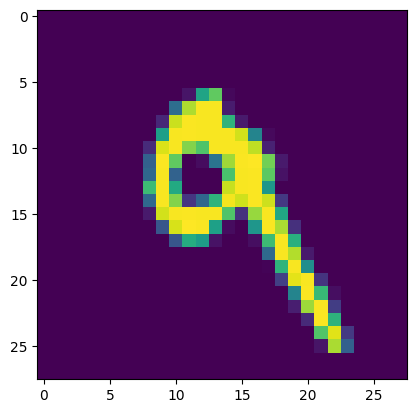

In [42]:
# hasil visualisasi gambar yang diprediksi
plt.imshow(X_test[7])
plt.show()

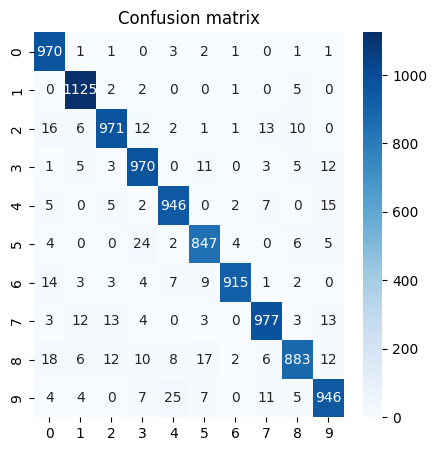

In [48]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Plot confusion matrix with sns
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.show()